# A Parallel workflow model
Here we are attempting to create a parallel workflow model without using any LLM. Where we calculate the strike rate, boundaries per ball and boundary_percentage

### 1. Import dependencies

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
import nest_asyncio
nest_asyncio.apply()
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image

### 2. Create a state

In [3]:
class BatsmanState(TypedDict):                      # The BatsmanState inherits a TypedDict
    runs: int
    balls: int
    fours: int
    sixes: int  
    strike_rate: float
    boundaries_per_ball: float
    boundary_percentage: float

### 3. Define the function for the graph node

In [4]:
# Here instead of returning the entire state, we are returning partial updates in the form of dictionary items of the altered values only

def calc_strike(state: BatsmanState) -> BatsmanState:
    runs = state["runs"]
    balls = state["balls"]

    strike = runs/balls

    return {"strike_rate" : strike}


def calc_bound_rate(state: BatsmanState) -> BatsmanState:
    boundaries = state["fours"] + state["sixes"]
    balls = state["balls"]

    bound_per_ball = boundaries/balls

    return {"boundaries_per_ball" : bound_per_ball}


def calc_bound_percent(state: BatsmanState) -> BatsmanState:
    boundaries = state["fours"] + state["sixes"]
    runs = state["runs"]

    bound_percent = (boundaries * 100)/runs

    return {"boundary_percentage" : bound_percent}

### 4. Create the graph

In [5]:
# Declare the graph:
graph = StateGraph(BatsmanState)                    # The StateGraph takes the state as a parameter, signifying that the "state" will be exchanged between the nodes through the edges.

# Add a nodes/states to the graph:
graph.add_node("calc_strike", calc_strike)
graph.add_node("calc_bound_rate", calc_bound_rate)
graph.add_node("calc_bound_percent", calc_bound_percent)


# Add edges to the graph:
graph.add_edge(START, 'calc_strike')
graph.add_edge(START, 'calc_bound_rate')
graph.add_edge(START, 'calc_bound_percent')

graph.add_edge('calc_strike', END)
graph.add_edge('calc_bound_rate', END)
graph.add_edge('calc_bound_percent', END)

### 5. Compile the graph

In [6]:
workflow = graph.compile()

### 6. The Graph

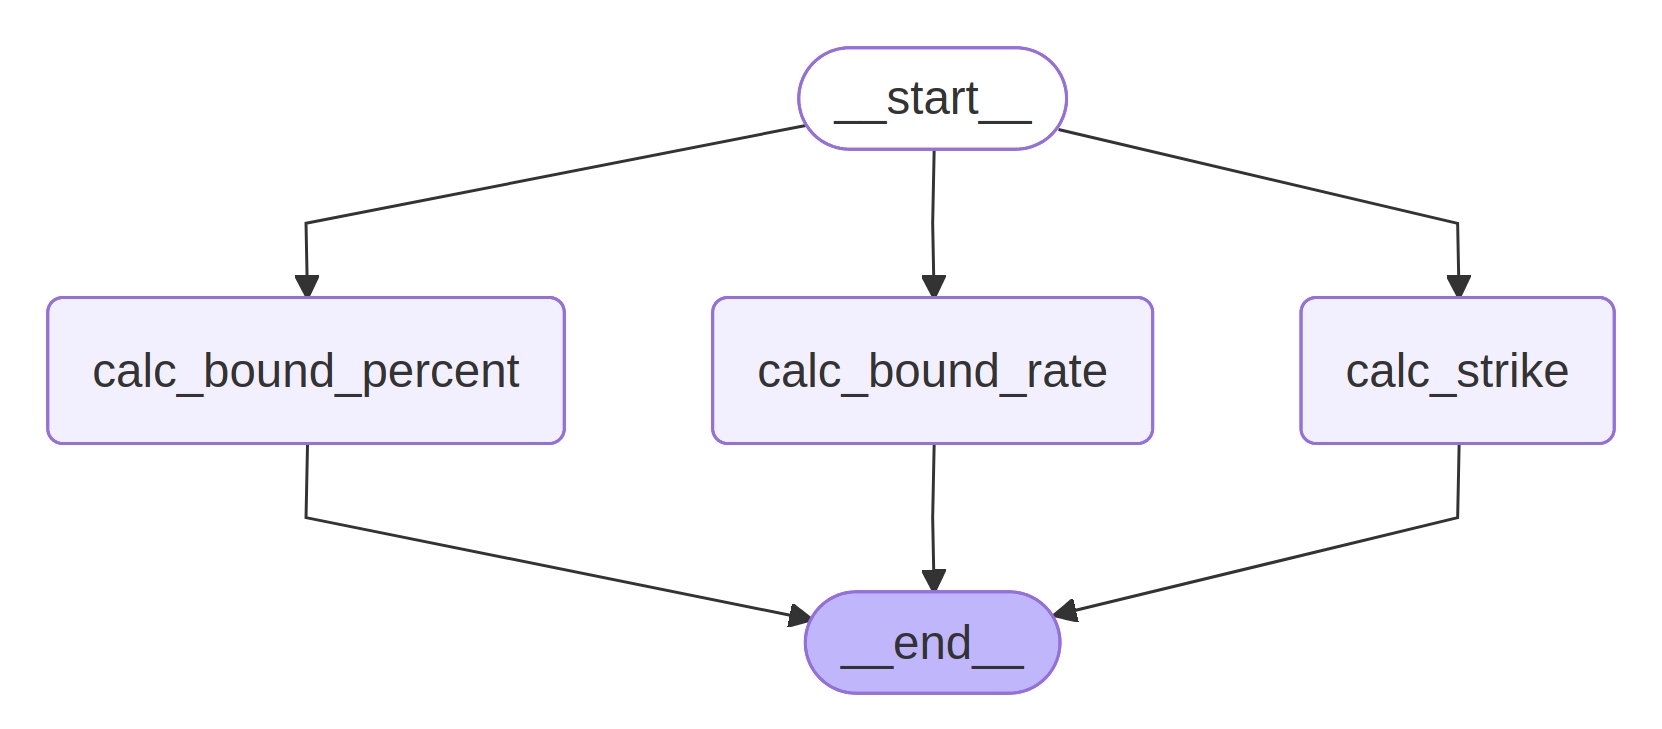

In [7]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER))

### 7. Run the code

In [8]:
initial_state = { "runs" : 50, "balls" : 12, "fours" : 2, "sixes" : 2  }

final_state = workflow.invoke(initial_state)

print(final_state)


{'runs': 50, 'balls': 12, 'fours': 2, 'sixes': 2, 'strike_rate': 4.166666666666667, 'boundaries_per_ball': 0.3333333333333333, 'boundary_percentage': 8.0}


In [9]:
print(final_state["strike_rate"])

4.166666666666667


In [10]:
print(final_state["boundaries_per_ball"])

0.3333333333333333


In [11]:
print(final_state["boundary_percentage"])

8.0
